In [26]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [27]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Import the dependencies.
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc
from flask import Flask, jsonify
from datetime import datetime, timedelta

In [29]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [30]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [31]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [32]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [33]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [34]:
# Find the most recent date in the data set.
for row in session.query(func.max(Measurement.date)).all():
    print(row)

('2017-08-23',)


In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(func.max(Measurement.date)).scalar()
# Calculate the date one year from the last date in data set.
most_recent_date = datetime.strptime(most_recent_date, '%Y-%m-%d')
print(most_recent_date)

2017-08-23 00:00:00


2016-08-22 00:00:00
2016-08-23, 0.0
2016-08-24, 0.08
2016-08-25, 0.08
2016-08-26, 0.0
2016-08-27, 0.0
2016-08-28, 0.01
2016-08-29, 0.0
2016-08-30, 0.0
2016-08-31, 0.13
2016-09-01, 0.0
2016-09-02, 0.0
2016-09-03, 0.0
2016-09-04, 0.03
2016-09-07, 0.05
2016-09-08, 0.0
2016-09-09, 0.03
2016-09-10, 0.0
2016-09-11, 0.05
2016-09-12, 0.0
2016-09-13, 0.02
2016-09-14, 1.32
2016-09-15, 0.42
2016-09-16, 0.06
2016-09-17, 0.05
2016-09-18, 0.0
2016-09-19, 0.0
2016-09-20, 0.0
2016-09-21, 0.0
2016-09-22, 0.02
2016-09-23, 0.0
2016-09-24, 0.0
2016-09-25, 0.0
2016-09-26, 0.06
2016-09-27, 0.02
2016-09-28, 0.0
2016-09-29, 0.0
2016-09-30, 0.0
2016-10-01, 0.0
2016-10-02, 0.0
2016-10-03, 0.0
2016-10-04, 0.0
2016-10-05, 0.0
2016-10-06, 0.0
2016-10-07, 0.0
2016-10-08, 0.0
2016-10-09, 0.0
2016-10-10, 0.0
2016-10-11, 0.0
2016-10-12, 0.0
2016-10-13, 0.0
2016-10-14, 0.0
2016-10-15, 0.0
2016-10-16, 0.0
2016-10-17, 0.01
2016-10-18, 0.0
2016-10-19, 0.0
2016-10-20, 0.0
2016-10-21, 0.05
2016-10-22, 0.15
2016-10-23, 0.01


Text(0, 0.5, 'Inches')

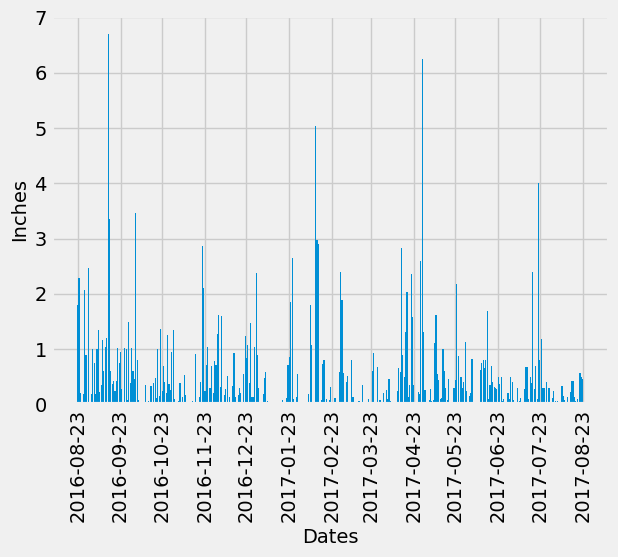

In [36]:
import numpy as np
import matplotlib.pyplot as plt
# most_recent_date = dt.date(2017,8,23)
# print(most_recent_date)
one_year_prior = most_recent_date - timedelta(days=366)
print(one_year_prior)
# Perform a query to retrieve the data and precipitation scores
one_year_prior_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_prior, Measurement.prcp != None).all()
for row in one_year_prior_data:
    print(f"{row.date}, {row.prcp}")
# Save the query results as a Pandas DataFrame. Explicitly set the column names
one_year_prior_data_df = pd.DataFrame(one_year_prior_data, columns=['Date', 'Precipitation'])
# Sort the dataframe by date
one_year_prior_data_df = one_year_prior_data_df.sort_values(by='Date', ascending=True)
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
prcp_plot = ax.bar(one_year_prior_data_df['Date'], one_year_prior_data_df['Precipitation'])
ax.set_xticks(['2016-08-23', '2016-09-23', '2016-10-23', '2016-11-23', '2016-12-23',\
'2017-01-23', '2017-02-23', '2017-03-23', '2017-04-23', '2017-05-23', '2017-06-23', '2017-07-23', '2017-08-23'])
plt.xticks(rotation = 'vertical')
plt.xlabel('Dates')
plt.ylabel('Inches')


In [37]:
one_year_prior_data_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [38]:
from sqlalchemy import create_engine, text
engine = create_engine('sqlite:///Resources/hawaii.sqlite')
conn = engine.connect()

In [39]:
# Design a query to calculate the total number of stations in the dataset
stations_count_query = text("SELECT count(station.id) from station")
stations_count = conn.execute(stations_count_query)
stations_count.fetchall()

[(9,)]

In [40]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations_query = text("SELECT measurement.station, count(measurement.prcp) FROM measurement\
                                  group by measurement.station order by count(measurement.prcp) desc")
most_active_stations = conn.execute(most_active_stations_query)
most_active_stations.fetchall()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [41]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stations_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station == 'USC00519281').all()
most_active_stations_stats

[(54.0, 85.0, 71.66378066378067)]

2017-08-18 00:00:00
2016-08-17 00:00:00
2016-08-18, 80.0
2016-08-19, 79.0
2016-08-20, 81.0
2016-08-21, 79.0
2016-08-22, 78.0
2016-08-23, 77.0
2016-08-24, 77.0
2016-08-25, 80.0
2016-08-26, 80.0
2016-08-27, 75.0
2016-08-28, 73.0
2016-08-29, 78.0
2016-08-30, 77.0
2016-08-31, 78.0
2016-09-01, 80.0
2016-09-02, 80.0
2016-09-03, 78.0
2016-09-04, 78.0
2016-09-05, 78.0
2016-09-06, 73.0
2016-09-07, 74.0
2016-09-08, 80.0
2016-09-09, 79.0
2016-09-10, 77.0
2016-09-11, 80.0
2016-09-12, 76.0
2016-09-13, 79.0
2016-09-14, 75.0
2016-09-15, 79.0
2016-09-16, 78.0
2016-09-17, 79.0
2016-09-18, 78.0
2016-09-19, 78.0
2016-09-20, 76.0
2016-09-21, 74.0
2016-09-22, 77.0
2016-09-23, 78.0
2016-09-24, 79.0
2016-09-25, 79.0
2016-09-26, 77.0
2016-09-27, 80.0
2016-09-28, 78.0
2016-09-29, 78.0
2016-09-30, 78.0
2016-10-01, 77.0
2016-10-02, 79.0
2016-10-03, 79.0
2016-10-04, 79.0
2016-10-05, 79.0
2016-10-06, 75.0
2016-10-07, 76.0
2016-10-08, 73.0
2016-10-09, 72.0
2016-10-10, 71.0
2016-10-11, 77.0
2016-10-12, 79.0
2016-10-

Text(0, 0.5, 'Frequency')

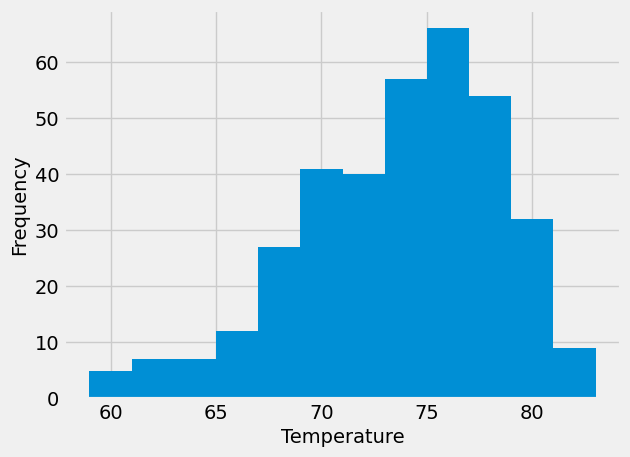

In [42]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_most_recent_date = session.query(func.max(Measurement.date)).filter(Measurement.station == 'USC00519281').scalar()
# Calculate the date one year from the last date in data set.
most_active_station_most_recent_date = datetime.strptime(most_active_station_most_recent_date, '%Y-%m-%d')
print(most_active_station_most_recent_date)
most_active_station_one_year_prior = most_active_station_most_recent_date - timedelta(days=366)
print(most_active_station_one_year_prior)
# Perform a query to retrieve the data and precipitation scores
most_active_station_one_year_prior_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= most_active_station_one_year_prior, Measurement.tobs != None, Measurement.station == 'USC00519281').all()
for row in most_active_station_one_year_prior_data:
    print(f"{row.date}, {row.tobs}")
# Save the query results as a Pandas DataFrame. Explicitly set the column names
most_active_station_one_year_prior_data_df = pd.DataFrame(most_active_station_one_year_prior_data, columns=['Date', 'Temperature'])
# Sort the dataframe by date
most_active_station_one_year_prior_data_df = most_active_station_one_year_prior_data_df.sort_values(by='Date', ascending=True)
plt.hist(most_active_station_one_year_prior_data_df['Temperature'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [43]:
# Close Session
session.close()